K-Means Clustering
----

k-means clustering algorithm is unsupervised learning algorithm 

K-means clustering is a clustering algorithm that aims to partition n observations into k clusters.

suppose i have 100 rows and 4 columns , by clustering those are clustered into 3 clusters which are having 23 in cluster1, 22 in cluster2 , 55 in cluster3 

Initialisation – K initial “means” (centroids) are generated at random

Assignment – K clusters are created by associating each observation with the nearest centroid

Update – The centroid of the clusters becomes the new mean

Assignment and Update are repeated iteratively until convergence

The end result is that the sum of squared errors is minimised between points and their respective centroids.

http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("clusteringdatasample.csv")

In [14]:
df.head()

,Sqft,Price
0,1177.698,62000
1,2134.800,78000
2,1138.560,58000
3,1458.780,45000
4,967.776,45000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 2 columns):
Sqft     645 non-null float64
Price    645 non-null int64
dtypes: float64(1), int64(1)
memory usage: 10.2 KB


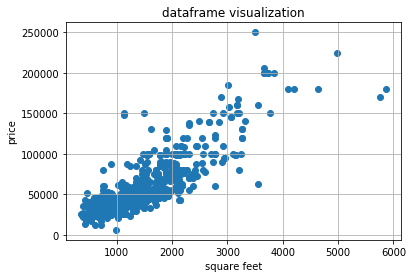

In [16]:
plt.scatter(df['Sqft'],df['Price'])
plt.xlabel('square feet')
plt.ylabel('price')
plt.title('dataframe visualization')
plt.grid()

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.

As k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

In [17]:
import sklearn
from sklearn.cluster import KMeans
print(dir(sklearn.cluster))


['AffinityPropagation', 'AgglomerativeClustering', 'Birch', 'DBSCAN', 'FeatureAgglomeration', 'KMeans', 'MeanShift', 'MiniBatchKMeans', 'SpectralBiclustering', 'SpectralClustering', 'SpectralCoclustering', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_dbscan_inner', '_feature_agglomeration', '_hierarchical', '_k_means', '_k_means_elkan', 'affinity_propagation', 'affinity_propagation_', 'bicluster', 'birch', 'dbscan', 'dbscan_', 'estimate_bandwidth', 'get_bin_seeds', 'hierarchical', 'k_means', 'k_means_', 'linkage_tree', 'mean_shift', 'mean_shift_', 'spectral', 'spectral_clustering', 'ward_tree']


In [18]:
print(dir(KMeans))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_test_data', '_estimator_type', '_get_param_names', '_transform', 'fit', 'fit_predict', 'fit_transform', 'get_params', 'predict', 'score', 'set_params', 'transform']


In [19]:
print(dir(kmeans))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_test_data', '_estimator_type', '_get_param_names', '_transform', 'algorithm', 'cluster_centers_', 'copy_x', 'fit', 'fit_predict', 'fit_transform', 'get_params', 'inertia_', 'init', 'labels_', 'max_iter', 'n_clusters', 'n_init', 'n_iter_', 'n_jobs', 'precompute_distances', 'predict', 'random_state', 'score', 'set_params', 'tol', 'transform', 'verbose']


In [20]:
scores = [] # Empty list
for i in range(1,10): # giving k values as 1 to 10 as choice in loop 
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    scores.append(kmeans.inertia_)
    
    
# score is nothing but the sum of squared distances for each k in the range specified

In [21]:
print(scores)

[818168893996.5986, 280633029700.5842, 127250641005.00888, 80767202704.34637, 55202575676.42343, 36728600151.19784, 28436845930.68735, 21790154639.27394, 17907718205.740547]


In [26]:
centroids = kmeans.cluster_centers_
print(centroids) # 3 centroids we got because k value is set to 3 by elbow method 

[[  2000.90788827  85684.95530726]
 [  1165.87706824  42198.19294118]
 [  3211.65907317 163650.29268293]]


Text(0.5, 0, 'k value')

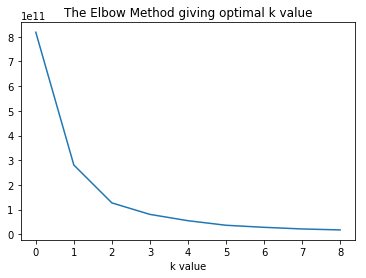

In [27]:
plt.plot(scores)
plt.title('The Elbow Method giving optimal k value')
plt.xlabel('k value')

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [114]:
clusters = kmeans.predict(df)

Entire 646 rows are clustered into 3 clusters 0 , 1 , 2 

In [115]:
clusters

array([0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1,

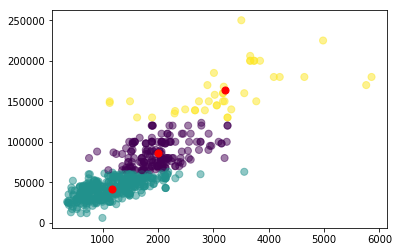

In [28]:
plt.scatter(df['Sqft'],df['Price'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [29]:
df.shape

(645, 2)

In [118]:
import numpy as np
df.iloc[np.where(clusters == 0)].shape

(441, 2)

In [119]:
df.iloc[np.where(clusters == 1)].shape

(163, 2)

In [120]:
df.iloc[np.where(clusters == 2)].shape

(41, 2)

The sum of all cluster elements = orignal data set rows 

645 = 441+163+41

In [32]:
new_observation = [[1000,600000]]
kmeans.predict(new_observation)

array([2])

Image color compression using K-Means
-------

In [33]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline

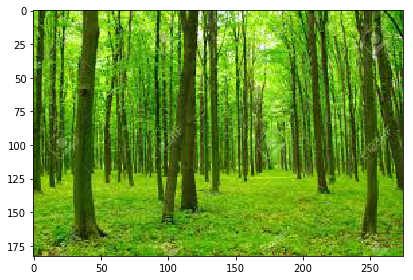

In [34]:
imshow('forestpic.png')

In [38]:
img = imread('forestpic.png')

In [39]:
img.shape

(183, 275, 3)

In [40]:
img = img/255

RGB (Red, Green, Blue) are 8 bit each.
The range for each individual colour is 0-255 (as 2^8 = 256 possibilities).
The combination range is 256*256*256.

By dividing by 255, the 0-255 range can be described with a 0.0-1.0 range where 0.0 means 0 (0x00) and 1.0 means 255 (0xFF).

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)

In [59]:
kmeans.fit(img.reshape(-1,3))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
img.reshape(-1,3).shape

(50325, 3)

In [61]:
kmeans.cluster_centers_

array([[0.84787806, 0.9593473 , 0.69442654],
       [0.40313966, 0.63137616, 0.13292193],
       [0.61603206, 0.78702302, 0.36853389],
       [0.22347733, 0.4243765 , 0.01728588],
       [0.5769563 , 0.82793669, 0.13613418],
       [0.51550516, 0.75585242, 0.0611151 ],
       [0.65584759, 0.90404394, 0.24757614],
       [0.23935913, 0.32510373, 0.06024255],
       [0.53836347, 0.7576526 , 0.24315111],
       [0.75501947, 0.94802885, 0.41534988],
       [0.28656145, 0.52292008, 0.03291642],
       [0.29883485, 0.41297229, 0.11902615],
       [0.42593641, 0.6820847 , 0.05107422],
       [0.45971961, 0.61431806, 0.24793323],
       [0.09698327, 0.22061342, 0.00552788],
       [0.34794821, 0.60691676, 0.04065014],
       [0.18050241, 0.25162894, 0.03198759],
       [0.3615441 , 0.52154633, 0.15538459],
       [0.16073084, 0.32334226, 0.0061571 ],
       [0.47304057, 0.71564306, 0.14974774]])

In [62]:
kmeans.labels_

array([ 4,  4,  5, ..., 15, 15, 15])

In [63]:
img_new = kmeans.cluster_centers_[kmeans.labels_]

In [64]:
img_tf = img_new.reshape(183, 275, 3)

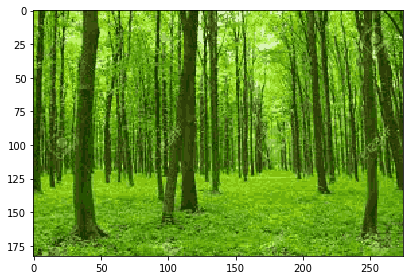

In [66]:
imshow(img_tf)


In [ ]:
# from dataframe we will create graphs and save as a picture or image 
# in similar way a image is also a data in format of png or jpeg or someother format 
# using kmeans clustering we are reducing the color of image by taking n_clustering as 10 or 20 or whatever value 


f1 is orginal image = 168 kb ,
f2 is compressed image of f1 = 83kb 

input to kmeans clustering can be of csv or image as well based on business need 
